# VISUALIZATIONS

After our data has been fully cleaned now e an use the __cleaned_aviation_data.csv__ file to plot meaningfull visuakization thet describe our data.

We weil 1st need to import all the nesecsary libraries and load the data

Atfer we will need to save the images in the visualizations folder inside the images folder.

In [3]:
#Importing all libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We will also plot the vvisualization within this notebook
%matplotlib inline

In [5]:
#load the cleaned_aviation_data.csv  data into a DataFrame
df = pd.read_csv('Data Sets/cleaned_aviation_data.csv ')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,State.Abbreviation,US_State
0,20001218X45444,Accident,Sea87La080,1948-10-24,"Moose Creek, Id",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,ID,Idaho
1,20001218X45447,Accident,Lax94La336,1962-07-19,"Bridgeport, Ca",United States,Destroyed,Piper,Pa24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,CA,California
2,20061025X01555,Accident,Nyc07La005,1974-08-30,"Saltville, Va",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,0.0,0.0,1.0,VA,Virginia
3,20001218X45448,Accident,Lax96La321,1977-06-19,"Eureka, Ca",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,CA,California
4,20041105X01764,Accident,Chi79Fa064,1979-08-02,"Canton, Oh",United States,Destroyed,Cessna,501,No,1.0,Turbo Fan,1.0,2.0,0.0,0.0,OH,Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82204,20221227106491,Accident,Era23La093,2022-12-26,"Annapolis, Md",United States,Unknown,Piper,Pa-28-151,No,1.0,Reciprocating,0.0,1.0,0.0,0.0,MD,Maryland
82205,20221227106494,Accident,Era23La095,2022-12-26,"Hampton, Nh",United States,Unknown,Bellanca,7Eca,No,1.0,Reciprocating,0.0,0.0,0.0,0.0,NH,New Hampshire
82206,20221227106497,Accident,Wpr23La075,2022-12-26,"Payson, Az",United States,Substantial,American Champion Aircraft,8Gcbc,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,AZ,Arizona
82207,20221227106498,Accident,Wpr23La076,2022-12-26,"Morgan, Ut",United States,Unknown,Cessna,210N,No,1.0,Reciprocating,0.0,0.0,0.0,0.0,UT,Utah


## TRENDS

Under trends I will look at trends over the years how the number are if they are __increasing__, __decreasing__ or __fluctuating__.
This will tell us if with time and perhaps if technological advancements have reduced, increased or had no affect on the aviation accidnts and incidents


Plots to be ploted here will be:
- Trends of accidents and incedents over the years
- Fatal, serious, Minor injuries and total uniured over the years
- Trends of makes over the years
- Trends by Aircraft damage over the years

First we will need to retrive the year from the 'Event.Date' column and create a year column containing only the year

In [29]:
#Convert the datatype of the 'Event.Date' column to datetime data type
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

#Creating a years column by retrivinng the year from the 'Event.Date' column
df['Year'] = df['Event.Date'].dt.year
df[['Event.Date', 'Year']].head()

,Event.Date,Year
0,1948-10-24,1948
1,1962-07-19,1962
2,1974-08-30,1974
3,1977-06-19,1977
4,1979-08-02,1979


__After trying to plot with the number of years the years are too many to be clear on a plot so by having them in  decade would help the visualization look better__

In [43]:
# Create a Decade column
df['Decade'] = (df['Year'] // 10) * 10

#This converts the years into the nearest decade
df['Decade'].head()

0    1940
1    1960
2    1970
3    1970
4    1970
Name: Decade, dtype: int32

With our years column all done now we can start to plot

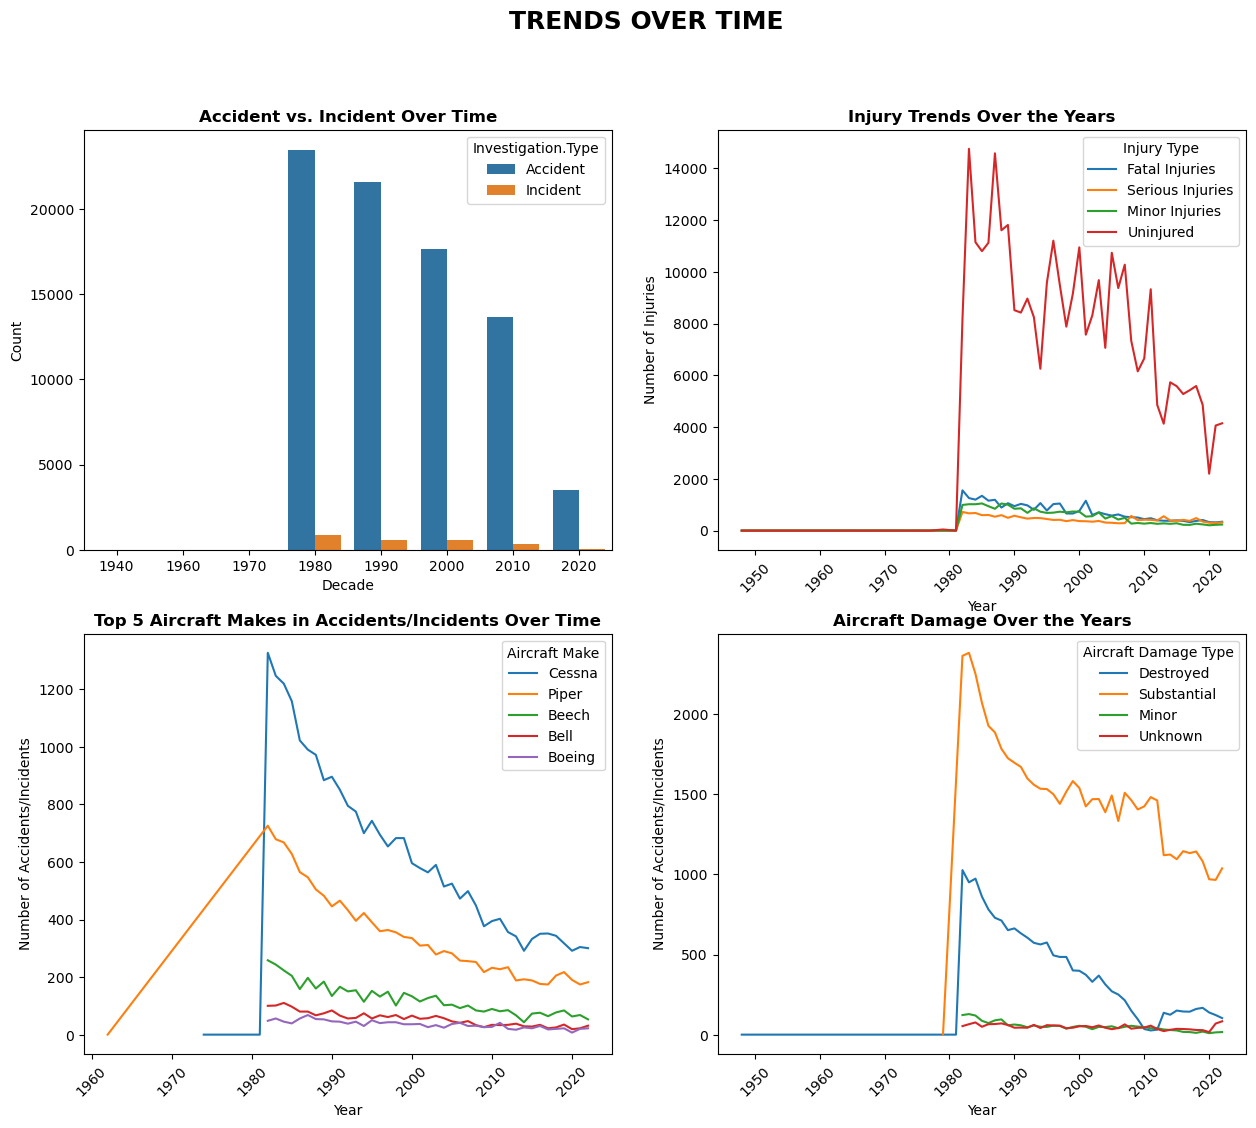

In [71]:
#Create figure and axes for each of our plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('TRENDS OVER TIME', fontsize = 18, fontweight = 'bold')

#1st plot Trend of investigation type(accidents/incidents) over the years
investigation_counts = df.groupby(['Decade', 'Investigation.Type']).size().reset_index(name = 'Count')
sns.barplot(x = 'Decade', y = 'Count', hue = 'Investigation.Type', data = investigation_counts, ax = axes[0, 0])
axes[0, 0].set_title("Accident vs. Incident Over Time", fontweight = 'bold')

#2nd a line plot of the diffrent kind of inuries over the years 
yearly_trends = df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                                    'Total.Minor.Injuries', 'Total.Uninjured']].sum().reset_index()

# Plot in [0, 1] (Line Plot)
sns.lineplot(x = 'Year', y = 'Total.Fatal.Injuries', data = yearly_trends, label = 'Fatal Injuries', ax = axes[0, 1])
sns.lineplot(x = 'Year', y = 'Total.Serious.Injuries', data = yearly_trends, label = 'Serious Injuries', ax = axes[0, 1])
sns.lineplot(x = 'Year', y = 'Total.Minor.Injuries', data = yearly_trends, label = 'Minor Injuries', ax = axes[0, 1])
sns.lineplot(x = 'Year', y = 'Total.Uninjured', data = yearly_trends, label = 'Uninjured', ax = axes[0, 1])

axes[0, 1].set_title("Injury Trends Over the Years", fontweight = 'bold')
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Number of Injuries")
axes[0, 1].tick_params(axis = 'x', rotation=45) 
axes[0, 1].legend(title = "Injury Type")

#3rd lineplot of make involved in accidents/incedents over time
#Since there are over 7400 diffrent makes we will use the top 5 makes
top_5_makes = df['Make'].value_counts().head(5).index  

#Filter dataset to only include top 5 makes
df_top_makes = df[df['Make'].isin(top_5_makes)]

#Group by Year and Make to count occurrences
make_trends = df_top_makes.groupby(['Year', 'Make']).size().reset_index(name = 'Count')

#Plot in [1, 0] (Line Plot for Top 5 Makes Over Time)
for make in top_5_makes:
    sns.lineplot(x = 'Year', y = 'Count', data=make_trends[make_trends['Make'] == make], label = make, ax = axes[1, 0])

axes[1, 0].set_title("Top 5 Aircraft Makes in Accidents/Incidents Over Time", fontweight = 'bold')
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Number of Accidents/Incidents")
axes[1, 0].tick_params(axis = 'x', rotation = 45)
axes[1, 0].legend(title = "Aircraft Make")

#4th lineplot of aircraft damage over the years
damage_trends = df.groupby(['Year', 'Aircraft.damage']).size().reset_index(name='Count')

# Plot in [1, 1] (Line Plot for Aircraft Damage Over Time)
for damage_type in df['Aircraft.damage'].unique():
    sns.lineplot(x='Year', y='Count', data=damage_trends[damage_trends['Aircraft.damage'] == damage_type], 
                 label=damage_type, ax=axes[1, 1])

# Formatting
axes[1, 1].set_title("Aircraft Damage Over the Years", fontweight='bold')
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Number of Accidents/Incidents")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title="Aircraft Damage Type")

#save the image to visualization folder inside the images folder
plt.savefig("Images/Visualizations/trends_analysis.png", dpi=300, bbox_inches='tight')
plt.show()